In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import gmaps
from pytrends.request import TrendReq
from pprint import pprint
import string
import praw
import datetime

# Import API key
from config import reddit_id
from config import reddit_secret
from config import username
from config import password

## Generate Reddit List

In [12]:
# Import Reddit credentials
reddit = praw.Reddit(client_id=reddit_id,
                     client_secret=reddit_secret,
                     password=password,
                     user_agent=f"script by u/{username}",
                     username=username)
print(reddit.user.me())
print(f"script by u/{username}")

# Initialize count and lists for DataFrame
count=0
timestamps=[]
timestamps_conv=[]
submission_title=[]
likes=[]

for submission in reddit.subreddit('news').search('ISIS', sort='new', time_filter='all', limit=300):
    count+=1
    print(count)
    timestamps.append(submission.created)
    print(submission.created)
    value = datetime.datetime.fromtimestamp(submission.created)
    timestamps_conv.append(value)
    print(value)
    submission_title.append(submission.title)
    print(submission.title)
    likes.append(submission.ups)
    print(submission.ups)

MathGuyFromGallifrey
script by u/MathGuyFromGallifrey
1
1536105081.0
2018-09-04 16:51:21
Al Qaeda trying to regain primacy as Islamic State loses ground: NATO
60
2
1535993767.0
2018-09-03 09:56:07
The Syrian Army is preparing for one final attack to end its seven-year rebellion
64
3
1535636562.0
2018-08-30 06:42:42
Russia warns U.S. against 'illegal aggression against Syria'
25
4
1535326733.0
2018-08-26 16:38:53
U.S. strike kills ISIS leader in Afghanistan
2354
5
1535080725.0
2018-08-23 20:18:45
Former Elkhart woman charged with conspiracy to provide material support to ISIS
41
6
1535054360.0
2018-08-23 12:59:20
ISIS leader al-Baghdadi appears to call for attacks on Canada in new audio recording
897
7
1535043894.0
2018-08-23 10:04:54
Paris knife attack: One killed, two seriously injured
881
8
1535003329.0
2018-08-22 22:48:49
Columbia mom charged with sex trafficking disabled daughter
105
9
1534965229.0
2018-08-22 12:13:49
Army soldier accused of wanting to help ISIS to plead guilty, la

101
1513701293.0
2017-12-19 08:34:53
Iraqi refugee who wanted to bomb Texas malls for ISIS is sentenced
107
102
1513663659.0
2017-12-18 22:07:39
Temple University investigating racist fliers
3
103
1513641094.0
2017-12-18 15:51:34
Indian ISIS member tries to slit prison warder’s neck while chanting slogans
61
104
1513630039.0
2017-12-18 12:47:19
Army Sgt. La David T. Johnson fought to end after ambush in Niger, wasn't caught or executed: Military report
434
105
1513628744.0
2017-12-18 12:25:44
ISIS Claims Responsibility For Quetta (Pakistan) Church attacks - EurAsian Times
16
106
1513300512.0
2017-12-14 17:15:12
ISIS weapons arsenal included some purchased by U.S. government
63
107
1513125083.0
2017-12-12 16:31:23
Teen charged with trying to help ISIS had big plans: Authorities
61
108
1513115287.0
2017-12-12 13:48:07
Akayed Ullah: New York bombing suspect charged
322
109
1513057528.0
2017-12-11 21:45:28
New York Bomber Was Inspired by ISIS Christmas Attacks, Officials Say
287
110
151291

201
1505370592.0
2017-09-13 23:29:52
B-52s Are Back In The Skies Of Afghanistan Dropping Bombs Once Again
65
202
1505267412.0
2017-09-12 18:50:12
Meme of car plowing protesters accidentally posted to a Chelan County Facebook page
21
203
1505119001.0
2017-09-11 01:36:41
Feds have at least six open cases looking at ISIS support in Minnesota
78
204
1505032174.0
2017-09-10 01:29:34
2,100 bodies of civilians discovered in aftermath of Mosul
3029
205
1504998956.0
2017-09-09 16:15:56
Woman who sought to join Islamic State group gets 8 years
1734
206
1504973065.0
2017-09-09 09:04:25
Syrian army and allies retake ISIS-controlled oilfield
12
207
1504939367.0
2017-09-08 23:42:47
US pulls back from watching ISIS convoy at request of Russians , Pentagon says
67
208
1504843386.0
2017-09-07 21:03:06
US warplanes pick off ISIS fighters drawn to stranded convoy ‘like moths to the flame’
323
209
1504821555.0
2017-09-07 14:59:15
ISIS calling for poisoning food in US and European grocery stores.
33
210
15

In [13]:
reddit_dict={"Time Created":timestamps,
           "Time Created (Human-Readable)":timestamps_conv,
           "Title": submission_title,
           "Likes": likes}

In [27]:
reddit_df=pd.DataFrame(reddit_dict)
mostliked_df = reddit_df.loc[reddit_df["Likes"]>=.5*reddit_df["Likes"].max(), :]
mostliked_df

,Time Created,Time Created (Human-Readable),Title,Likes
51,1.523647e+09,2018-04-13 12:17:36,Suspected White Supremacist Died Building ISIS...,42397
141,1.509679e+09,2017-11-02 20:11:06,N.J. police chief said black people are 'like ...,30527
174,1.507490e+09,2017-10-08 12:17:47,"ISIS Fighters, Having Pledged to Fight or Die,...",42030
230,1.502669e+09,2017-08-13 17:03:42,Charlottesville: man charged with murder was p...,43827


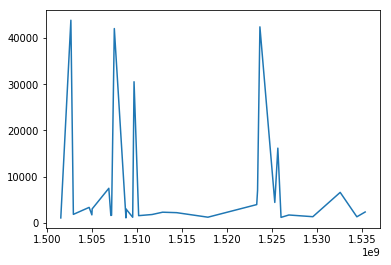

In [26]:
plt.plot(mostliked_df["Time Created"],mostliked_df["Likes"])
plt.show()